##  <font color='blue'> Table Of Contents </font>
- MySQL with Python
  - Connect to DB using mysql-connector-python package
  - Create database and tables
  - Perform DDL and DML Operations
    - Create
    - Alter
    - Insert
    - Select
    - Update
    - Delete
    - Drop
  - Open and run the file hr-schema-mysql.sql in MySQL Workbench
  - Implementation of clauses, conditions, aggregate functions and joins on hr schema
    - Groupby, Having, and Order by Clauses
    - OR, AND, NOT conditions
    - AVG, MIN, MAX, SUM, COUNT functions
    - Left joins and Right join

##  <font color='blue'> Introduction </font>

In this session we will be working on a small project. While working on this project we will cover the following items

1. Use **mysql-connector-python** to connect to a DB
2. Learn about the functionality of mysql-connector-python
3. Create a new database and create tables and perform DDL and DML operations
4. Open and run the file **hr-schema-mysql.sql** in MySQL Workbench and Implementation of clauses, conditions, aggregate functions and joins on hr schema

##  <font color='blue'> Required Installation </font>

Also ensure that you have installed the package mysql-connector-python as well.
Python, in itself provides no libraries to connect with DB(s). So in order to connect with MySQL server, you have to install this package on the machine where you will write the codes

##  <font color='blue'> Mysql with Python</font>
Now we will see as how we can connect with the database and perform various operations of Mysql with Python

In [1]:
#pip install mysql-connector-python

In [2]:
## Load required libraies
import mysql.connector
import pandas as pd

##  <font color='blue'> 1. Connect to Database</font>

In [3]:
## Code for connecting to Mysql server and closing the connection
import mysql.connector
  
connection = mysql.connector.connect(host ="localhost",
                                    user ="root",
                                    passwd ="Root")
 
print(connection)
  
## closing the connection
connection.close()

First statement is we import ```mysql.connector```.  
Use the method ***mysql.connector.connect()*** to connect to DB.  

Following is an explanation of the parameters we pass to this function... 
- ***host*** - IP address MySQL server on which the DB is hosted.   
- ***user*** - user who has access to this database,   
- ***password*** - password of the user  
<div class="alert alert-block alert-info">
    For more details refer - <a href="https://dev.mysql.com/doc/connector-python/en/connector-python-connectargs.html">Connection Parameters </a>
</div>

**NOTE:** Always close an open connection once you are done with the database operations

##  <font color='blue'> 2. Create Database</font>

- After connecting to the MySQL server, We will create a MYSQL database using Python.
- We will first create a **cursor()** object and then pass the SQL query as a string to the **execute()** method.

In [4]:
## Lets make a connection to Mysql server and perform some operations
connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="Root")
 
## creating a cursor object
cursorObject = connection.cursor()
 
## creating database
cursorObject.execute("CREATE DATABASE Orders")

## closing the connection after creating a database('Orders')
connection.close()

**.cursor()** : Return a new Cursor Object using the connection. This is used to do operations on MySQL server

**.execute(operation, params=None)**
- Prepare and execute a database operation (query or command).
- Parameters may be provided as sequence or mapping and will be bound to variables in the operation.
- While executing an insert statement it converts Python data type to MySQL data type.

###  <font color='blue'> 2.1 Create Table</font>

- We will follow the similar approach of writing the SQL querys as strings and then passing it to the execute() method of the cursor object. 

In [5]:
## Connect to Mysql server and choose the database('Orders') while connecting to the server
connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="Root",
                                     database = "Orders")

# creating a cursor object
cursorObject = connection.cursor()

# creating table
Customers =     """CREATE TABLE Customers (
                   CUSTOMER_NAME  VARCHAR(20) NOT NULL,
                   CUSTOMER_ID INT NOT NULL,
                   AGE INT,
                   PHNO INT,
                   ORDER_ID INT NOT NULL
                   )"""
  
# table created
cursorObject.execute(Customers)

##  <font color='blue'> 3. DDL and DML Operations</font>
###  <font color='blue'> 3.1 Alter</font>

In [6]:
alter_query = "ALTER table Customers rename to Customer_details;"
cursorObject.execute(alter_query)

###  <font color='blue'> 3.2 Insert</font>

In [7]:
## Inserting single row of values

insert_query = "INSERT INTO Customer_details (CUSTOMER_NAME, CUSTOMER_ID, AGE, PHNO, ORDER_ID) VALUES (%s, %s, %s, %s, %s)"
val = ("Billy", 1001, 45, 18055, 60709)
   
cursorObject.execute(insert_query, val)
connection.commit()

**.commit()**
This method sends a COMMIT statement to the MySQL server, committing the current transaction. Since by default Connector/Python does not auto-commit, it is important to call this method after every transaction that modifies data for tables.

In [8]:
## Inserting multiple rows of values

insert_query = "INSERT INTO Customer_details (CUSTOMER_NAME, CUSTOMER_ID, AGE, PHNO, ORDER_ID) VALUES (%s, %s, %s, %s, %s)"
val = [("Johnny", 1008, 30, 18065, 60809),
       ("Tommy",  1006, 35, 18007, 60777),
       ("James",  1004, 42, 18099, 60989),
       ("Darcy",  1005, 38, 18003, 60111),
       ("Samson", 1002, 44, 18012, 60121),
       ("Xerxes", 1003, 33, 18066, 60345),
       ("Ceaser", 1007, 41, 18099, 60999)]
   
cursorObject.executemany(insert_query, val)
connection.commit()

###  <font color='blue'> 3.3 Select</font>
Fetching data from the database table and returning in python

In [9]:
select_query = "SELECT * FROM Customer_details"
cursorObject.execute(select_query)
   
output = cursorObject.fetchall()
   
for x in output:
    print(x)

('Billy', 1001, 45, 18055, 60709)
('Johnny', 1008, 30, 18065, 60809)
('Tommy', 1006, 35, 18007, 60777)
('James', 1004, 42, 18099, 60989)
('Darcy', 1005, 38, 18003, 60111)
('Samson', 1002, 44, 18012, 60121)
('Xerxes', 1003, 33, 18066, 60345)
('Ceaser', 1007, 41, 18099, 60999)


#### We can also put the output of the query into pandas dataframe and view the data

In [10]:
output_df = pd.DataFrame(output, columns=['CUSTOMER_NAME', 'CUSTOMER_ID', 'AGE', 'PHNO', 'ORDER_ID'])
output_df

,CUSTOMER_NAME,CUSTOMER_ID,AGE,PHNO,ORDER_ID
0,Billy,1001,45,18055,60709
1,Johnny,1008,30,18065,60809
2,Tommy,1006,35,18007,60777
3,James,1004,42,18099,60989
4,Darcy,1005,38,18003,60111
5,Samson,1002,44,18012,60121
6,Xerxes,1003,33,18066,60345
7,Ceaser,1007,41,18099,60999


###  <font color='blue'> 3.4 Update</font>

In [11]:
update_query = "UPDATE Customer_details SET AGE = 25 WHERE CUSTOMER_NAME ='Billy'"
cursorObject.execute(update_query)
connection.commit()

In [12]:
## Lets check if the data is updated or not

select_query = "SELECT * FROM Customer_details WHERE CUSTOMER_NAME='Billy'"
cursorObject.execute(select_query)
   
output = cursorObject.fetchall()
   
for x in output:
    print(x)

('Billy', 1001, 25, 18055, 60709)


###  <font color='blue'> 3.5 Delete</font>

In [13]:
delete_query = "DELETE FROM Customer_details WHERE CUSTOMER_NAME ='Billy'"
cursorObject.execute(delete_query)
connection.commit()

In [14]:
## Lets check if the data is deleted or not

select_query = "SELECT * FROM Customer_details"
cursorObject.execute(select_query)
   
output = cursorObject.fetchall()
   
for x in output:
    print(x)

('Johnny', 1008, 30, 18065, 60809)
('Tommy', 1006, 35, 18007, 60777)
('James', 1004, 42, 18099, 60989)
('Darcy', 1005, 38, 18003, 60111)
('Samson', 1002, 44, 18012, 60121)
('Xerxes', 1003, 33, 18066, 60345)
('Ceaser', 1007, 41, 18099, 60999)


###  <font color='blue'> 3.6 Drop</font>

In [15]:
update_query = "DROP TABLE Customer_details"
cursorObject.execute(update_query)
connection.commit()

In [16]:
# closing the connection after performing database operations on database "Orders"
connection.close()

## <font color='blue'>4. Open and run the file hr-schema-mysql.sql in MySQL Workbench</font>

Open and run the file ```hr-schema-mysql.sql``` in MySQL Workbench   

<div class="alert alert-block alert-info">
    Assuming user has installed MySQLWorkbench application before running the .sql file
</div>

After successfully executing the .sql file in MySQL Workbench, this will create a DB ```hr``` with the required tables and sample data. We will use this to implement the Query & Clauses, Conditions, Aggregate Functions and joins

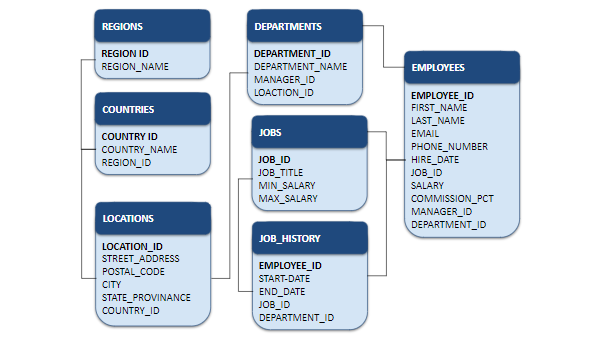

### <font color='blue'>4.1 Clauses</font>
### <font color='blue'>4.1.1 Group by</font>

In [18]:
## Lets connect to Mysql server and will choose the database(hr) while making a connection to server
connection = mysql.connector.connect(host ="localhost",
                                     user ="root",
                                     passwd ="Root",
                                     database = "hr")

# creating a cursor object
cursorObject = connection.cursor()
  
groupby_query = "SELECT job_id, COUNT(*) as 'total' FROM employees GROUP BY job_id"
cursorObject.execute(groupby_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

('AC_ACCOUNT', 1)
('AC_MGR', 1)
('AD_ASST', 1)
('AD_PRES', 1)
('AD_VP', 2)
('FI_ACCOUNT', 5)
('FI_MGR', 1)
('HR_REP', 1)
('IT_PROG', 5)
('MK_MAN', 1)
('MK_REP', 1)
('PR_REP', 1)
('PU_CLERK', 5)
('PU_MAN', 1)
('SA_MAN', 5)
('SA_REP', 30)
('SH_CLERK', 20)
('ST_CLERK', 20)
('ST_MAN', 5)


### <font color='blue'>4.1.2 Having</font>

In [19]:
having_query = "SELECT job_id, COUNT(*) as 'total' FROM employees GROUP BY job_id having COUNT(*)>4"
cursorObject.execute(having_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

('FI_ACCOUNT', 5)
('IT_PROG', 5)
('PU_CLERK', 5)
('SA_MAN', 5)
('SA_REP', 30)
('SH_CLERK', 20)
('ST_CLERK', 20)
('ST_MAN', 5)


### <font color='blue'>4.1.3 Order by</font>

In [20]:
orderby_query = "SELECT first_name,job_id,salary from employees ORDER BY first_name limit 5"
cursorObject.execute(orderby_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

('Adam', 'ST_MAN', Decimal('8200.00'))
('Alana', 'SH_CLERK', Decimal('3100.00'))
('Alberto', 'SA_MAN', Decimal('12000.00'))
('Alexander', 'PU_CLERK', Decimal('3100.00'))
('Alexander', 'IT_PROG', Decimal('9000.00'))


### <font color='blue'>4.2 Conditions</font>
### <font color='blue'>4.2.1 AND</font>

In [21]:
and_query = "SELECT * FROM employees WHERE employee_id > 101 AND employee_id < 110"
cursorObject.execute(and_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

(102, 'Lex', 'De Haan', 'LDEHAAN', '515.123.4569', datetime.date(1993, 1, 13), 'AD_VP', Decimal('17000.00'), None, 100, 90)
(103, 'Alexander', 'Hunold', 'AHUNOLD', '590.423.4567', datetime.date(1990, 1, 3), 'IT_PROG', Decimal('9000.00'), None, 102, 60)
(104, 'Bruce', 'Ernst', 'BERNST', '590.423.4568', datetime.date(1991, 5, 21), 'IT_PROG', Decimal('6000.00'), None, 103, 60)
(105, 'David', 'Austin', 'DAUSTIN', '590.423.4569', datetime.date(1997, 6, 25), 'IT_PROG', Decimal('4800.00'), None, 103, 60)
(106, 'Valli', 'Pataballa', 'VPATABAL', '590.423.4560', datetime.date(1998, 2, 5), 'IT_PROG', Decimal('4800.00'), None, 103, 60)
(107, 'Diana', 'Lorentz', 'DLORENTZ', '590.423.5567', datetime.date(1999, 2, 7), 'IT_PROG', Decimal('4200.00'), None, 103, 60)
(108, 'Nancy', 'Greenberg', 'NGREENBE', '515.124.4569', datetime.date(1994, 8, 17), 'FI_MGR', Decimal('12000.00'), None, 101, 100)
(109, 'Daniel', 'Faviet', 'DFAVIET', '515.124.4169', datetime.date(1994, 8, 16), 'FI_ACCOUNT', Decimal('9000.0

### <font color='blue'>4.2.2 OR</font>

In [22]:
or_query = "SELECT * FROM employees WHERE employee_id  = 101 or employee_id = 110"
cursorObject.execute(or_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

(101, 'Neena', 'Kochhar', 'NKOCHHAR', '515.123.4568', datetime.date(1989, 9, 21), 'AD_VP', Decimal('17000.00'), None, 100, 90)
(110, 'John', 'Chen', 'JCHEN', '515.124.4269', datetime.date(1997, 9, 28), 'FI_ACCOUNT', Decimal('8200.00'), None, 108, 100)


### <font color='blue'>4.2.3 NOT</font>

In [23]:
not_query = "SELECT * FROM employees WHERE commission_pct IS NOT NULL"
cursorObject.execute(not_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

(145, 'John', 'Russell', 'JRUSSEL', '011.44.1344.429268', datetime.date(1996, 10, 1), 'SA_MAN', Decimal('14000.00'), Decimal('0.40'), 100, 80)
(146, 'Karen', 'Partners', 'KPARTNER', '011.44.1344.467268', datetime.date(1997, 1, 5), 'SA_MAN', Decimal('13500.00'), Decimal('0.30'), 100, 80)
(147, 'Alberto', 'Errazuriz', 'AERRAZUR', '011.44.1344.429278', datetime.date(1997, 3, 10), 'SA_MAN', Decimal('12000.00'), Decimal('0.30'), 100, 80)
(148, 'Gerald', 'Cambrault', 'GCAMBRAU', '011.44.1344.619268', datetime.date(1999, 10, 15), 'SA_MAN', Decimal('11000.00'), Decimal('0.30'), 100, 80)
(149, 'Eleni', 'Zlotkey', 'EZLOTKEY', '011.44.1344.429018', datetime.date(2000, 1, 29), 'SA_MAN', Decimal('10500.00'), Decimal('0.20'), 100, 80)
(150, 'Peter', 'Tucker', 'PTUCKER', '011.44.1344.129268', datetime.date(1997, 1, 30), 'SA_REP', Decimal('10000.00'), Decimal('0.30'), 145, 80)
(151, 'David', 'Bernstein', 'DBERNSTE', '011.44.1344.345268', datetime.date(1997, 3, 24), 'SA_REP', Decimal('9500.00'), Decima

### <font color='blue'>4.3 Aggregate Functions</font>
### <font color='blue'>4.3.1 Avg</font>

In [24]:
avg_query = "SELECT avg(salary) from employees"
cursorObject.execute(avg_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

(Decimal('6461.682243'),)


### <font color='blue'>4.3.2 Count</font>

In [25]:
count_query = "SELECT count(employee_id) from employees"
cursorObject.execute(count_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

(107,)


### <font color='blue'>4.3.3 Max</font>

In [26]:
max_query = "SELECT max(salary) from employees"
cursorObject.execute(max_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

(Decimal('24000.00'),)


### <font color='blue'>4.4 Joins</font>
### <font color='blue'>4.4.1 Left Join</font>
In a left join, table on the left returns all the rows and the table on right returns rows when the common columns of both tables have same value. 
NULL value is returned for unmatching rows.

In [27]:
left_join_query = """SELECT j.job_id, e.first_name, e.last_name, j.job_title
             FROM jobs as j 
             LEFT JOIN employees as e 
             ON e.job_id = j.job_id"""
            
cursorObject.execute(left_join_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

('AC_ACCOUNT', 'William', 'Gietz', 'Public Accountant')
('AC_MGR', 'Shelley', 'Higgins', 'Accounting Manager')
('AD_ASST', 'Jennifer', 'Whalen', 'Administration Assistant')
('AD_PRES', 'Steven', 'King', 'President')
('AD_VP', 'Neena', 'Kochhar', 'Administration Vice President')
('AD_VP', 'Lex', 'De Haan', 'Administration Vice President')
('FI_ACCOUNT', 'Daniel', 'Faviet', 'Accountant')
('FI_ACCOUNT', 'John', 'Chen', 'Accountant')
('FI_ACCOUNT', 'Ismael', 'Sciarra', 'Accountant')
('FI_ACCOUNT', 'Jose Manuel', 'Urman', 'Accountant')
('FI_ACCOUNT', 'Luis', 'Popp', 'Accountant')
('FI_MGR', 'Nancy', 'Greenberg', 'Finance Manager')
('HR_REP', 'Susan', 'Mavris', 'Human Resources Representative')
('IT_PROG', 'Alexander', 'Hunold', 'Programmer')
('IT_PROG', 'Bruce', 'Ernst', 'Programmer')
('IT_PROG', 'David', 'Austin', 'Programmer')
('IT_PROG', 'Valli', 'Pataballa', 'Programmer')
('IT_PROG', 'Diana', 'Lorentz', 'Programmer')
('MK_MAN', 'Michael', 'Hartstein', 'Marketing Manager')
('MK_REP', 'Pa

### <font color='blue'>4.4.2 Right Join</font>
In a right join, table on the right returns all the rows and the table on left returns rows when the common columns of both tables have same value. 
NULL is returned for unmatching rows

In [28]:
right_join_query = """SELECT j.job_id, e.first_name, e.last_name, j.job_title
                     FROM employees as e RIGHT JOIN jobs as j
                     USING(job_id)"""
            
cursorObject.execute(right_join_query)
 
output = cursorObject.fetchall()
   
for x in output:
    print(x)

('AC_ACCOUNT', 'William', 'Gietz', 'Public Accountant')
('AC_MGR', 'Shelley', 'Higgins', 'Accounting Manager')
('AD_ASST', 'Jennifer', 'Whalen', 'Administration Assistant')
('AD_PRES', 'Steven', 'King', 'President')
('AD_VP', 'Neena', 'Kochhar', 'Administration Vice President')
('AD_VP', 'Lex', 'De Haan', 'Administration Vice President')
('FI_ACCOUNT', 'Daniel', 'Faviet', 'Accountant')
('FI_ACCOUNT', 'John', 'Chen', 'Accountant')
('FI_ACCOUNT', 'Ismael', 'Sciarra', 'Accountant')
('FI_ACCOUNT', 'Jose Manuel', 'Urman', 'Accountant')
('FI_ACCOUNT', 'Luis', 'Popp', 'Accountant')
('FI_MGR', 'Nancy', 'Greenberg', 'Finance Manager')
('HR_REP', 'Susan', 'Mavris', 'Human Resources Representative')
('IT_PROG', 'Alexander', 'Hunold', 'Programmer')
('IT_PROG', 'Bruce', 'Ernst', 'Programmer')
('IT_PROG', 'David', 'Austin', 'Programmer')
('IT_PROG', 'Valli', 'Pataballa', 'Programmer')
('IT_PROG', 'Diana', 'Lorentz', 'Programmer')
('MK_MAN', 'Michael', 'Hartstein', 'Marketing Manager')
('MK_REP', 'Pa

In [29]:
# closing the connection after performing database opertions on hr schema
connection.close()

----------------
### Happy Learning:)
----------------